# Flights Data Exploration Challenge

In this challenge, you'll explore a real-world dataset containing flights data from the US Department of Transportation.

Let's start by loading and viewing the data.

In [2]:
import pandas as pd

df_flights = pd.read_csv('flights.csv')
df_flights.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


The dataset contains observations of US domestic flights in 2013, and consists of the following fields:

- **Year**: The year of the flight (all records are from 2013)
- **Month**: The month of the flight
- **DayofMonth**: The day of the month on which the flight departed
- **DayOfWeek**: The day of the week on which the flight departed - from 1 (Monday) to 7 (Sunday)
- **Carrier**: The two-letter abbreviation for the airline.
- **OriginAirportID**: A unique numeric identifier for the departure aiport
- **OriginAirportName**: The full name of the departure airport
- **OriginCity**: The departure airport city
- **OriginState**: The departure airport state
- **DestAirportID**: A unique numeric identifier for the destination aiport
- **DestAirportName**: The full name of the destination airport
- **DestCity**: The destination airport city
- **DestState**: The destination airport state
- **CRSDepTime**: The scheduled departure time
- **DepDelay**: The number of minutes departure was delayed (flight that left ahead of schedule have a negative value)
- **DelDelay15**: A binary indicator that departure was delayed by more than 15 minutes (and therefore considered "late")
- **CRSArrTime**: The scheduled arrival time
- **ArrDelay**: The number of minutes arrival was delayed (flight that arrived ahead of schedule have a negative value)
- **ArrDelay15**: A binary indicator that arrival was delayed by more than 15 minutes (and therefore considered "late")
- **Cancelled**: A binary indicator that the flight was cancelled

Your challenge is to explore the flight data to analyze possible factors that affect delays in departure or arrival of a flight.

1. Start by cleaning the data.
    - Identify any null or missing data, and impute appropriate replacement values.
    - Identify and eliminate any outliers in the **DepDelay** and **ArrDelay** columns.
2. Explore the cleaned data.
    - View summary statistics for the numeric fields in the dataset.
    - Determine the distribution of the **DepDelay** and **ArrDelay** columns.
    - Use statistics, aggregate functions, and visualizations to answer the following questions:
        - *What are the average (mean) departure and arrival delays?*
        - *How do the carriers compare in terms of arrival delay performance?*
        - *Is there a noticable difference in arrival delays for different days of the week?*
        - *Which departure airport has the highest average departure delay?*
        - *Do **late** departures tend to result in longer arrival delays than on-time departures?*
        - *Which route (from origin airport to destination airport) has the most **late** arrivals?*
        - *Which route has the highest average arrival delay?*
        
Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [01 - Flights Challenge.ipynb](01%20-%20Flights%20Solution.ipynb).

# Start by cleaning the data 



In [8]:
# Use the isnull function to see which values are null
df_flights.isnull()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271935,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
271936,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
271937,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
271938,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


As you can see we have a bunch of null objects, lets try to get a number on how many are missing

In [3]:
#Use the sum function with the isnull
df_flights.isnull().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64

Hmm, looks like theres 2,761 items null in the DepDel15. This means we have 2761 answers that are missing regarding whether the flight departed 15 minutes after its promised departure time. 

In [13]:
df_flights[df_flights.isnull().any(axis=1)]

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
171,2013,4,18,4,DL,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,13930,Chicago O'Hare International,Chicago,IL,835,0,NaN,945,0,1,1
359,2013,5,22,3,OO,11433,Detroit Metro Wayne County,Detroit,MI,13930,Chicago O'Hare International,Chicago,IL,1719,0,NaN,1738,0,1,1
429,2013,7,3,3,MQ,13851,Will Rogers World,Oklahoma City,OK,13930,Chicago O'Hare International,Chicago,IL,1935,0,NaN,2125,0,1,1
545,2013,4,13,6,FL,14524,Richmond International,Richmond,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,630,0,NaN,809,0,1,1
554,2013,5,8,3,EV,12953,LaGuardia,New York,NY,11193,Cincinnati/Northern Kentucky International,Cincinnati,OH,1320,0,NaN,1524,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271410,2013,8,5,1,WN,14831,Norman Y. Mineta San Jose International,San Jose,CA,10800,Bob Hope,Burbank,CA,1525,0,NaN,1625,0,1,1
271607,2013,6,18,2,EV,14100,Philadelphia International,Philadelphia,PA,13244,Memphis International,Memphis,TN,600,0,NaN,729,0,1,1
271634,2013,5,8,3,AA,11298,Dallas/Fort Worth International,Dallas/Fort Worth,TX,14100,Philadelphia International,Philadelphia,PA,1325,0,NaN,1745,0,1,1
271671,2013,10,8,2,WN,12892,Los Angeles International,Los Angeles,CA,12889,McCarran International,Las Vegas,NV,1440,0,NaN,1540,0,1,1


Now that we found the missing data, lets find appropriate replacement values by imputing. If we can't the binary option for delay, lets look at DepDelay to see if it was late. 


In [17]:
df_flights[df_flights.isnull().any(axis=1)].DepDelay.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: DepDelay, dtype: float64

The min, max, and mean are all 0; so it seems that none of these were actually late departures. Lets replace the missing DepDel15 indicator with a 0 and confirm there are no more missing values.

In [18]:
df_flights.DepDel15 = df_flights.DepDel15.fillna(0)
df_flights.isnull().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Carrier              0
OriginAirportID      0
OriginAirportName    0
OriginCity           0
OriginState          0
DestAirportID        0
DestAirportName      0
DestCity             0
DestState            0
CRSDepTime           0
DepDelay             0
DepDel15             0
CRSArrTime           0
ArrDelay             0
ArrDel15             0
Cancelled            0
dtype: int64

# Explore the clean data

Now that we have cleaned the data, lets explore its numerical attributes. We shouldn't use numerical calculations for headers like Year, Month, Day of Month, Day of Week, because even though they look like numbers in this tabular sheet, they represent something more categorical. If we want to replace them, we would replace them with Wednesday, or July e.g. 

But that's too much work, we already acknowledged it. So instead lets look at Departure Delay time because it gives us the number of minutes a plane is late. 

In [21]:
#Get the mean departure delay minutes using column name as index
mean_depdelay = df_flights['DepDelay'].mean()

#Get the mean arrive delay minutes
mean_arrdelay = df_flights['ArrDelay'].mean()

#Print the mean departure delay and arrive delay 
print('Average Departure Delay: {:.2f}\nAverage Arrival Delay: {:.2f}'.format(mean_depdelay, mean_arrdelay))

Average Departure Delay: 10.35
Average Arrival Delay: 6.50


OK, lets filter the DataFrame to find flights that depart later than the mean departure. 

In [24]:
#Get the flights that depart later than the average of 10.35 minutes 
df_flights[df_flights.DepDelay > mean_depdelay]

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
5,2013,7,28,7,UA,12478,John F. Kennedy International,New York,NY,14771,San Francisco International,San Francisco,CA,1710,87,1.0,2035,183,1,0
9,2013,5,12,7,UA,12478,John F. Kennedy International,New York,NY,12892,Los Angeles International,Los Angeles,CA,1759,40,1.0,2107,10,0,0
13,2013,7,17,3,AA,11298,Dallas/Fort Worth International,Dallas/Fort Worth,TX,13487,Minneapolis-St Paul International,Minneapolis,MN,2025,95,1.0,2245,90,1,0
16,2013,10,31,4,MQ,11057,Charlotte Douglas International,Charlotte,NC,12953,LaGuardia,New York,NY,1630,28,1.0,1830,26,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271924,2013,7,20,6,EV,11433,Detroit Metro Wayne County,Detroit,MI,12264,Washington Dulles International,Washington,DC,1008,142,1.0,1138,133,1,0
271930,2013,9,24,2,US,11057,Charlotte Douglas International,Charlotte,NC,13930,Chicago O'Hare International,Chicago,IL,2000,12,0.0,2057,5,0,0
271936,2013,4,19,5,FL,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,11697,Fort Lauderdale-Hollywood International,Fort Lauderdale,FL,1020,24,1.0,1218,61,1,0
271937,2013,10,26,6,WN,12191,William P Hobby,Houston,TX,10821,Baltimore/Washington International Thurgood Ma...,Baltimore,MD,1540,30,1.0,1935,15,1,0


In [25]:
#Get the flights that arrive later than the average of 6.5 minutes
df_flights[df_flights.ArrDelay > mean_arrdelay]

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
5,2013,7,28,7,UA,12478,John F. Kennedy International,New York,NY,14771,San Francisco International,San Francisco,CA,1710,87,1.0,2035,183,1,0
7,2013,7,28,7,EV,12264,Washington Dulles International,Washington,DC,14524,Richmond International,Richmond,VA,2218,4,0.0,2301,15,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271925,2013,6,30,7,YV,12339,Indianapolis International,Indianapolis,IN,12264,Washington Dulles International,Washington,DC,1437,-6,0.0,1615,48,1,0
271935,2013,9,20,5,VX,13204,Orlando International,Orlando,FL,12892,Los Angeles International,Los Angeles,CA,1730,1,0.0,1945,18,1,0
271936,2013,4,19,5,FL,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,11697,Fort Lauderdale-Hollywood International,Fort Lauderdale,FL,1020,24,1.0,1218,61,1,0
271937,2013,10,26,6,WN,12191,William P Hobby,Houston,TX,10821,Baltimore/Washington International Thurgood Ma...,Baltimore,MD,1540,30,1.0,1935,15,1,0


Now for example lets find the average number of minutes of flights that took longer than 10.35 minutes to depart. 

In [26]:
#What was the average time?
df_flights[df_flights.ArrDelay > mean_arrdelay].DepDelay.mean()

38.67715533374922

In [27]:
df_flights.describe()

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,271940.0,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000
mean,2013.0,6.978514,15.814775,3.899316,12744.899584,12739.136493,1325.498713,10.350449,0.199092,1505.477819,6.496650,0.215930,0.010723
std,0.0,1.982431,8.799033,1.987219,1501.199773,1502.569949,470.748546,35.673710,0.399318,493.204020,38.230331,0.411467,0.102995
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,1.000000,-63.000000,0.000000,1.000000,-75.000000,0.000000,0.000000
25%,2013.0,5.000000,8.000000,2.000000,11292.000000,11292.000000,920.000000,-4.000000,0.000000,1119.000000,-11.000000,0.000000,0.000000
50%,2013.0,7.000000,16.000000,4.000000,12892.000000,12892.000000,1320.000000,-1.000000,0.000000,1529.000000,-3.000000,0.000000,0.000000
75%,2013.0,9.000000,23.000000,6.000000,14057.000000,14057.000000,1725.000000,9.000000,0.000000,1918.000000,10.000000,0.000000,0.000000
max,2013.0,10.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,1425.000000,1.000000,2359.000000,1440.000000,1.000000,1.000000


Determine the distribution of the DepDelay and ArrDelay columns.

Minimum:-63.00
Mean:10.35
Median:-1.00
Mode:-3.00
Maximum:1425.00

Minimum:-75.00
Mean:6.50
Median:-3.00
Mode:0.00
Maximum:1440.00



/var/folders/1k/pj7f052n2sdf4ffp7kc4z34m0000gn/T/ipykernel_12878/40656780.py:40: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/1k/pj7f052n2sdf4ffp7kc4z34m0000gn/T/ipykernel_12878/40656780.py:40: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


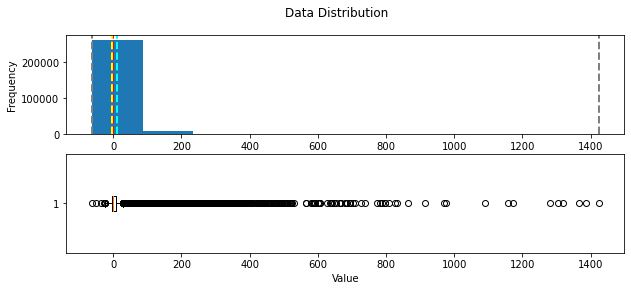

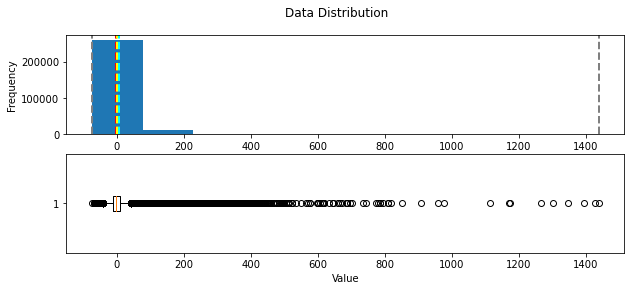

In [28]:
# Create a function that we can re-use
def show_distribution(var_data):
    from matplotlib import pyplot as plt

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Plot the histogram   
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle('Data Distribution')

    # Show the figure
    fig.show()


#Call the function for each delay field 
delayFields = ['DepDelay','ArrDelay']
for col in delayFields:
    show_distribution(df_flights[col])


There are a outliers at the lower and upper ends of both variables - particularly at the upper end.

Let's trim the data so that we include only rows where the values for these fields are within the 1st and 90th percentile.

Minimum:-11.00
Mean:-0.92
Median:-2.00
Mode:-3.00
Maximum:16.00

Minimum:-32.00
Mean:-5.03
Median:-6.00
Mode:0.00
Maximum:37.00



/var/folders/1k/pj7f052n2sdf4ffp7kc4z34m0000gn/T/ipykernel_12878/40656780.py:40: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/1k/pj7f052n2sdf4ffp7kc4z34m0000gn/T/ipykernel_12878/40656780.py:40: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


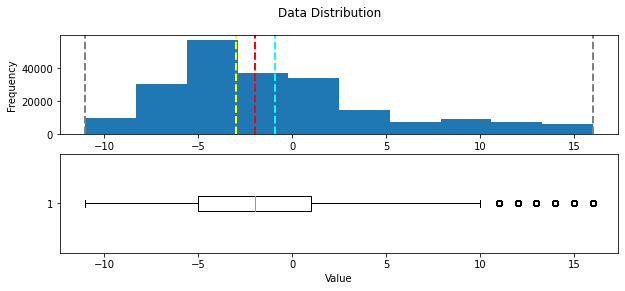

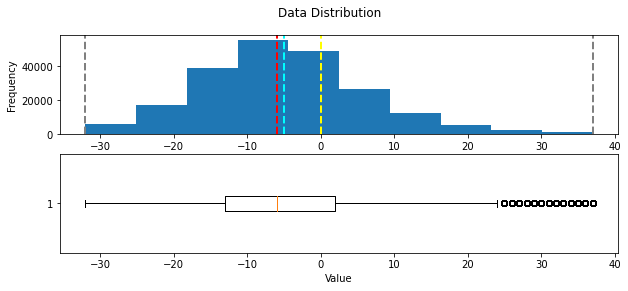

In [29]:
# Trim outliers for ArrDelay based on 1% and 90% percentiles
q01Arr = df_flights.ArrDelay.quantile(0.01)
q90Arr = df_flights.ArrDelay.quantile(0.90)
df_flights = df_flights[df_flights.ArrDelay < q90Arr]
df_flights = df_flights[df_flights.ArrDelay > q01Arr]

# Trim outliers for DepDelay based on 1% and 90% percentiles
q01Dep = df_flights.DepDelay.quantile(0.01)
q90Dep = df_flights.DepDelay.quantile(0.90)
df_flights = df_flights[df_flights.DepDelay < q90Dep]
df_flights = df_flights[df_flights.DepDelay > q01Dep]

# View the revised distributions
for col in delayFields:
    show_distribution(df_flights[col])

## Q: What are the average (mean) departure and arrival delays?

In [30]:
df_flights[delayFields].mean()

DepDelay   -0.921692
ArrDelay   -5.030276
dtype: float64

## Q: How do the carriers compare in terms of arrival delay performance?

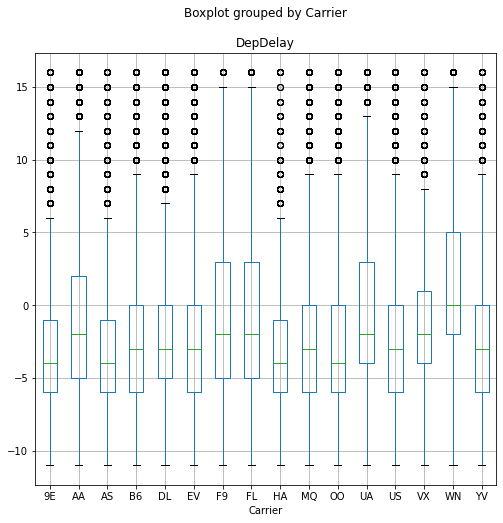

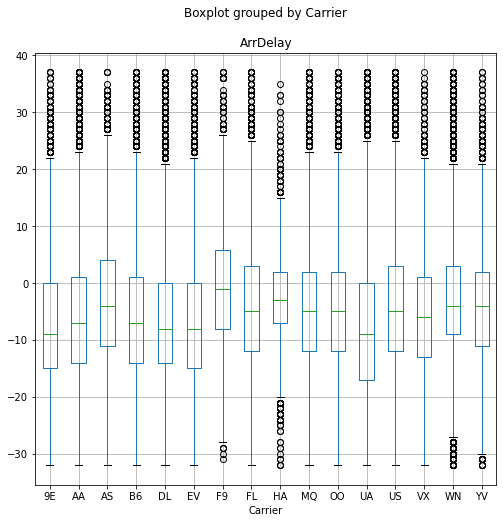

In [31]:
for col in delayFields:
    df_flights.boxplot(column=col, by='Carrier', figsize=(8,8))

## Q: Is there a noticable difference in arrival delays for different days of the week?

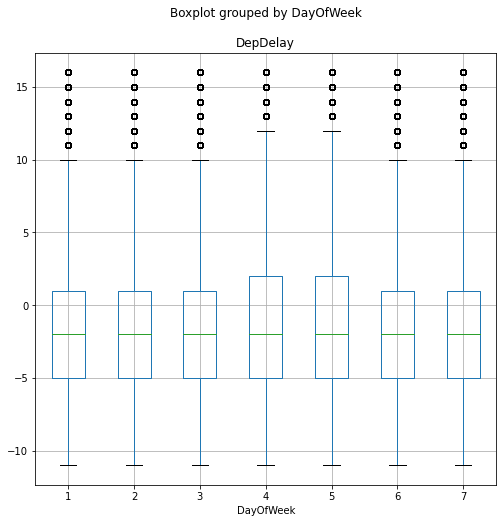

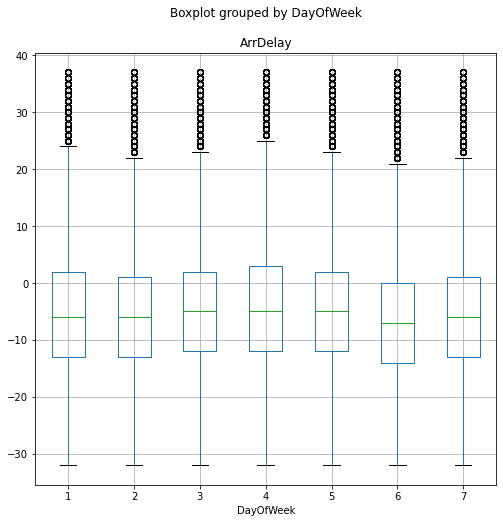

In [32]:
for col in delayFields:
    df_flights.boxplot(column=col, by='DayOfWeek', figsize=(8,8))

It seems like there is no huge difference in the Dep and Arr. They all have their averages and mediums around the same. 

## Which departure airport has the highest average departure delay?

,DepDelay
OriginAirportName,
Chicago Midway International,2.365960
Dallas Love Field,2.148798
William P Hobby,1.561927
Metropolitan Oakland International,0.964853
Denver International,0.807272
...,...
Memphis International,-2.962737
Tucson International,-2.989154
Ted Stevens Anchorage International,-3.149758


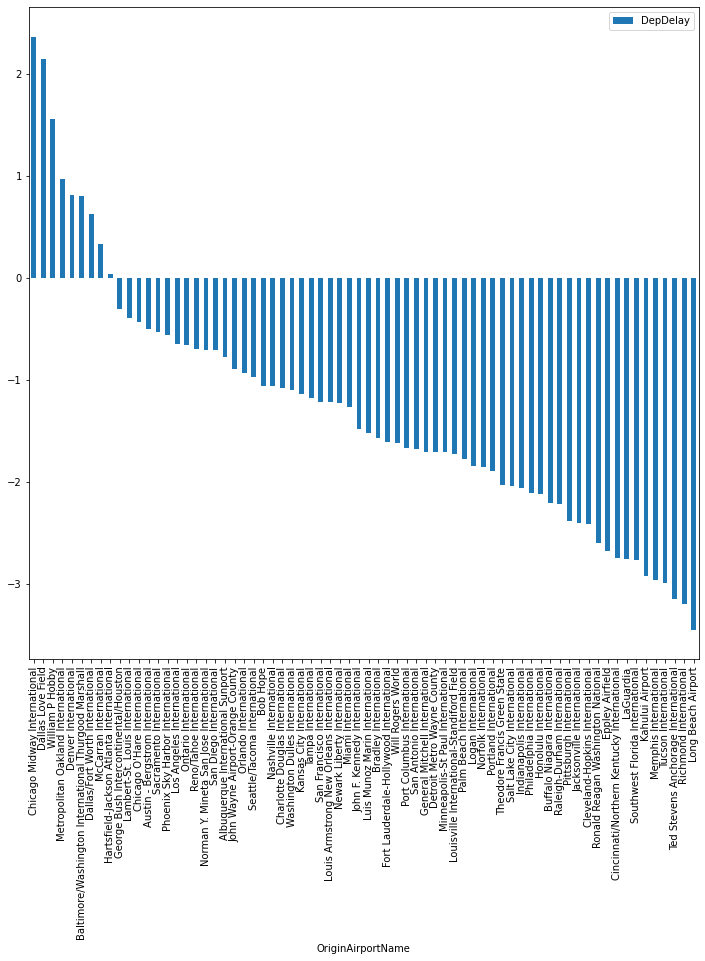

In [33]:
dep_airport_group = df_flights.groupby(df_flights.OriginAirportName)

mean_departure_delays = pd.DataFrame(dep_airport_group['DepDelay'].mean()).sort_values('DepDelay', ascending=False)
mean_departure_delays.plot(kind = "bar", figsize=(12,12))
mean_departure_delays